# Problem 3

In [19]:
%matplotlib inline

# load relevant packages
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [20]:
# load data
x = np.load("hw3_pulsars/pulsar_features.npy")
y = np.load("hw3_pulsars/pulsar_labels.npy")

nfeatures = x.shape[0]
nx = x.shape[1]

print(x.shape)
print(y.shape)

(2, 3278)
(1, 3278)


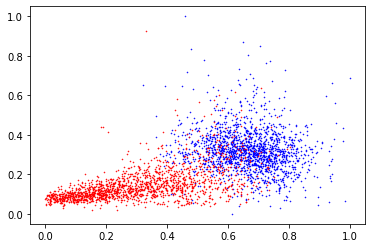

In [21]:
# plot data
negInd = y == -1
posInd = y == 1
plt.scatter(x[0, negInd[0, :]], x[1, negInd[0, :]], color='b', s=0.3)
plt.scatter(x[0, posInd[0, :]], x[1, posInd[0, :]], color='r', s=0.3)
plt.figure(1)
plt.show()

In [22]:
def objective_Ji(xi, yi, theta, A, reg_const):
    cond = 1-yi*theta.T.dot(xi)
    if cond < 0:
        return reg_const/(2*nx)*theta.T.dot(A).dot(theta)
    else:
        return cond/nx + reg_const/(2*nx)*theta.T.dot(A).dot(theta)


def subgradient_Ji(xi, yi, theta, A, reg_const):
    cond = 1-yi*theta.T.dot(xi)
    if cond < 0:
        return reg_const/nx*A.dot(theta)
    else:
        return -yi*xi/nx + reg_const/nx*A.dot(theta)
        
        
def gradient_descent(x, y, niter, reg_const):
    x_aug = np.vstack([np.ones(nx), x])  # augment x
    theta0 = np.zeros(nfeatures+1)       # construct theta0 = [b w^T]^T
    A = np.vstack([np.zeros(nfeatures+1), np.hstack([np.zeros([nfeatures,1]), np.eye(nfeatures)])])
    
    theta_new = theta0
    J = np.zeros(niter)
    
    for j in range(0,niter):
        grad = np.zeros(nfeatures+1)
        for i in range(nx):
            grad += subgradient_Ji(x_aug[:,i], y[0,i], theta_new, A, reg_const)
        theta_new -= 100/(j+1)*grad
        J[j] = np.sum([objective_Ji(x_aug[:,i], y[0,i], theta_new, A, reg_const) for i in range(nx)])
    return theta_new, J

def stochastic_gradient_descent(x, y, niter, reg_const):
    x_aug = np.vstack([np.ones(nx), x])  # augment x
    theta0 = np.zeros(nfeatures+1)       # construct theta0 = [b w^T]^T
    A = np.vstack([np.zeros(nfeatures+1), np.hstack([np.zeros([nfeatures,1]), np.eye(nfeatures)])])
    
    theta_new = theta0
    J = np.zeros(niter)
    for j in range(niter):
        randomized = np.random.permutation(nx)
        grad = np.zeros(nfeatures+1)
        for i in randomized:
            grad = subgradient_Ji(x_aug[:,i], y[0,i], theta_new, A, reg_const)
            theta_new -= 100/(j+1)*grad
        J[j] = np.sum([objective_Ji(x_aug[:,i], y[0,i], theta_new, A, reg_const) for i in range(nx)])
    return theta_new, J


gradient-descent results
hyperplane parametrs [b w^T]^T: [ 12.0680196  -17.81627138  -9.11707611]
toal margin: 0.16572727473352247
minimum value of objective function achieved: 0.44988413706113406


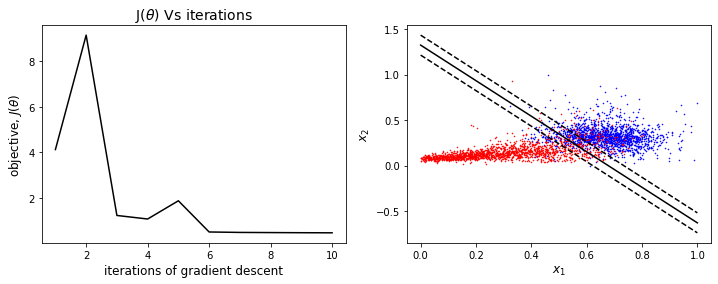

In [23]:
## part (b)
# problem setup 

reg_const = 0.001  # regularization const
niter = 10         # number of iterations
theta, J = gradient_descent(x, y, niter, reg_const)  # gradient-descent
print('gradient-descent results')
print('hyperplane parametrs [b w^T]^T: {}'.format(theta))
print('toal margin: {}'.format(np.abs(2/theta[0])))
print('minimum value of objective function achieved: {}'.format(np.min(J)) )

# line equation to plot
line = lambda x, label: 1/theta[2]*(- theta[0]+label - theta[1]*x)

# plot
fig, axs = plt.subplots(1, 2, figsize = (12,4))
iternum = np.arange(1,niter+1)
axs[0].plot(iternum,J, color = 'k')
axs[0].set_xlabel('iterations of gradient descent', fontsize = 12)
axs[0].set_ylabel(r'objective, $J(\theta)$', fontsize = 12)
axs[0].set_title(r'J($\theta$) Vs iterations', fontsize = 14)

# plot data
negInd = y == -1
posInd = y == 1
points = np.linspace(np.min(x[0,:]), np.max(x[0,:]), 100)
axs[1].scatter(x[0, negInd[0, :]], x[1, negInd[0, :]], color='b', s=0.3)
axs[1].scatter(x[0, posInd[0, :]], x[1, posInd[0, :]], color='r', s=0.3)
axs[1].plot(points,line(points,0), color = 'k')
axs[1].plot(points,line(points,1), 'k--')
axs[1].plot(points,line(points,-1), 'k--')
axs[1].set_xlabel(r'$x_{1}$', fontsize = 12)
axs[1].set_ylabel(r'$x_{2}$', fontsize = 12)
plt.savefig('prob3b.png')

stochastic-gradient-descent results
hyperplane parametrs [b w^T]^T: [ 4.00515219 -5.82463117 -4.41417027]
toal margin: 0.4993568043331084
minimum value of objective function achieved: 0.2582782419707573


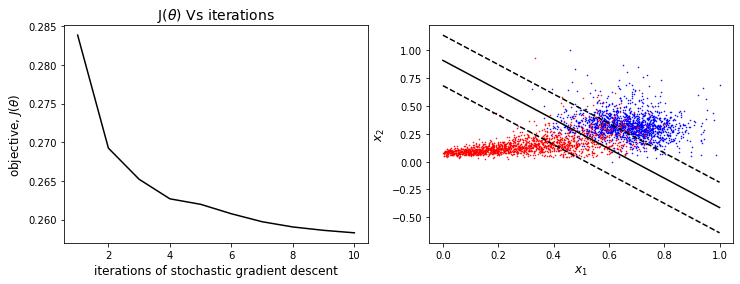

In [24]:
# part (c)
# problem setup 

reg_const = 0.001  # regularization const
niter = 10
theta, J = stochastic_gradient_descent(x, y, niter, reg_const)
print('stochastic-gradient-descent results')
print('hyperplane parametrs [b w^T]^T: {}'.format(theta))
print('toal margin: {}'.format(np.abs(2/theta[0])))
print('minimum value of objective function achieved: {}'.format(np.min(J)) )

# line equation to plot
line = lambda x, label: 1/theta[2]*(- theta[0]+label - theta[1]*x)

# plot
fig, axs = plt.subplots(1, 2, figsize = (12,4))
iternum = np.arange(1,niter+1)
axs[0].plot(iternum,J, color = 'k')
axs[0].set_xlabel('iterations of stochastic gradient descent', fontsize = 12)
axs[0].set_ylabel(r'objective, $J(\theta)$', fontsize = 12)
axs[0].set_title(r'J($\theta$) Vs iterations', fontsize = 14)

# plot data
# plot data
negInd = y == -1
posInd = y == 1
points = np.linspace(np.min(x[0,:]), np.max(x[0,:]), 100)
axs[1].scatter(x[0, negInd[0, :]], x[1, negInd[0, :]], color='b', s=0.3)
axs[1].scatter(x[0, posInd[0, :]], x[1, posInd[0, :]], color='r', s=0.3)
axs[1].plot(points,line(points,0), color = 'k')
axs[1].plot(points,line(points,1), 'k--')
axs[1].plot(points,line(points,-1), 'k--')
axs[1].set_xlabel(r'$x_{1}$', fontsize = 12)
axs[1].set_ylabel(r'$x_{2}$', fontsize = 12)
plt.savefig('prob3ci.png')


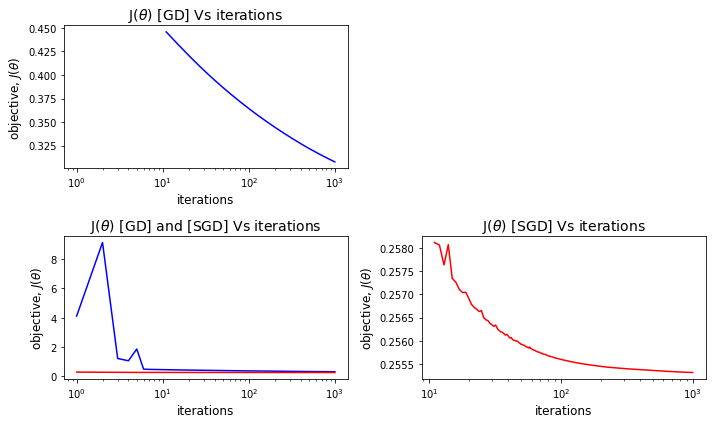

In [25]:
# examining the convergernce rate of the methods
reg_const = 0.001  # regularization const
niter = 1000        # running for 100 iterations

theta_gd, J_gd = gradient_descent(x, y, niter, reg_const)
theta_sgd, J_sgd = stochastic_gradient_descent(x, y, niter, reg_const)

iternum = np.arange(1,niter+1)

# plots 
fig, axs = plt.subplots(2, 2, figsize = (10,6))

axs[0, 0].semilogx(iternum[10:], J_gd[10:], color = 'blue')
axs[0, 0].set_xlabel('iterations',fontsize = 12)
axs[0, 0].set_ylabel(r'objective, $J(\theta)$',fontsize = 12)
axs[0, 0].set_title(r'J($\theta$) [GD] Vs iterations',fontsize = 14)

axs[1, 0].semilogx(iternum, J_gd, color = 'blue')
axs[1, 0].semilogx(iternum, J_sgd, color = 'red')
axs[1, 0].set_title(r'J($\theta$) [GD] and [SGD] Vs iterations',fontsize = 14)
axs[1, 0].set_xlabel('iterations',fontsize = 12)
axs[1, 0].set_ylabel(r'objective, $J(\theta)$',fontsize = 12)
axs[1, 0].sharex(axs[0, 0])

axs[0, 1].axis('off')

axs[1, 1].semilogx(iternum[10:], J_sgd[10:], color = 'red')
axs[1, 1].set_title(r'J($\theta$) [SGD] Vs iterations',fontsize = 14)
axs[1, 1].set_xlabel('iterations',fontsize = 12)
axs[1, 1].set_ylabel(r'objective, $J(\theta)$',fontsize = 12)                     
fig.tight_layout()
plt.savefig('prob3cii.png')